In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os
from google.colab import drive
from pathlib import Path
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Studies/Self_Study/Youtube/Data_Science_Lovers/Housing/Melbourne_housing.csv')

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df = df.drop(['Date', 'Distance', 'Lattitude', 'Longtitude', 'Propertycount', 'SellerG', 'Bedroom2', 'Method'], axis=1)

In [ ]:
df = df.rename(columns={'Car' : 'Carspots', 'Regionname': 'RegionName'})

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName
0,Abbotsford,68 Studley St,2,h,NaN,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,2,h,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,u,NaN,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan


In [ ]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [ ]:
df['Type'] = df['Type'].replace({'h':'house', 'u':'unit', 't':'townhouse'}) #Replacing columns for full name

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName
0,Abbotsford,68 Studley St,2,house,NaN,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,2,house,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,house,1035000.0,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,unit,NaN,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,3,house,1465000.0,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan


In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName
0,Abbotsford,68 Studley St,2,house,NaN,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,2,house,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,house,1035000.0,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,unit,NaN,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,3,house,1465000.0,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        34857 non-null  object 
 1   Address       34857 non-null  object 
 2   Rooms         34857 non-null  int64  
 3   Type          34857 non-null  object 
 4   Price         27247 non-null  float64
 5   Postcode      34856 non-null  float64
 6   Bathroom      26631 non-null  float64
 7   Carspots      26129 non-null  float64
 8   Landsize      23047 non-null  float64
 9   BuildingArea  13742 non-null  float64
 10  YearBuilt     15551 non-null  float64
 11  CouncilArea   34854 non-null  object 
 12  RegionName    34854 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
df.shape

(34857, 13)

In [ ]:
df.duplicated().sum()

61

In [ ]:
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName
736,Ashwood,2/21 Lavidge Rd,4,townhouse,NaN,3147.0,NaN,NaN,NaN,NaN,NaN,Monash City Council,Southern Metropolitan
2260,Brunswick,8/2 Pottery Ct,3,townhouse,641000.0,3056.0,2.0,1.0,0.0,112.0,1900.0,Moreland City Council,Northern Metropolitan
2690,Camberwell,3/220 Warrigal Rd,2,unit,435000.0,3124.0,1.0,1.0,896.0,77.0,1960.0,Boroondara City Council,Southern Metropolitan
4484,Footscray,4 Adelaide St,4,house,1225000.0,3011.0,2.0,1.0,319.0,130.0,1915.0,Maribyrnong City Council,Western Metropolitan
5833,Kensington,106/80 Speakmen St,1,unit,312000.0,3031.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32906,Thornbury,388b Station St,2,townhouse,925000.0,3071.0,NaN,NaN,NaN,NaN,NaN,Darebin City Council,Northern Metropolitan
33372,Glen Waverley,2/10 Lancelot Cr,4,townhouse,NaN,3150.0,NaN,NaN,NaN,NaN,NaN,Monash City Council,Eastern Metropolitan
34018,Brighton,4/33 North Rd,2,unit,900000.0,3186.0,NaN,NaN,NaN,NaN,NaN,Bayside City Council,Southern Metropolitan
34100,Carrum,2/32 Valetta St,3,house,788000.0,3197.0,NaN,NaN,NaN,NaN,NaN,Kingston City Council,South-Eastern Metropolitan


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(34796, 13)

<Axes: ylabel='Price'>

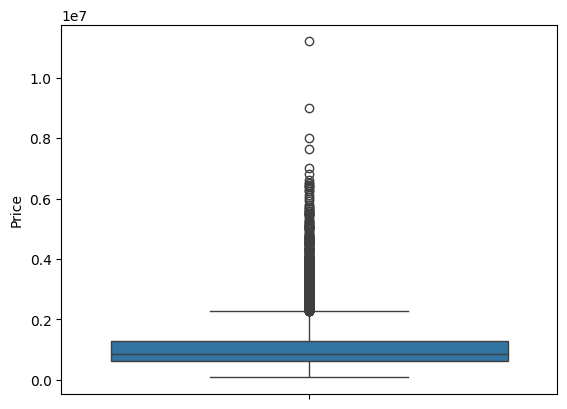

In [ ]:
# outliers

sns.boxplot(df['Price'])

In [ ]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7584
Postcode,1
Bathroom,8210
Carspots,8712
Landsize,11785
BuildingArea,21082


In [ ]:
# Droping the Nan values for vaues small ones

df = df.dropna(subset=['Postcode', 'CouncilArea', 'RegionName'])

In [ ]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7584
Postcode,0
Bathroom,8207
Carspots,8709
Landsize,11782
BuildingArea,21079


In [ ]:
df.dtypes

,0
Suburb,object
Address,object
Rooms,int64
Type,object
Price,float64
Postcode,float64
Bathroom,float64
Carspots,float64
Landsize,float64
BuildingArea,float64


In [ ]:
# Converting object to string
df['Suburb'] = df['Suburb'].astype(str)

<ipython-input-22-865bbbe0888b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suburb'] = df['Suburb'].astype(str)


In [ ]:
df['Address'] = df['Address'].astype(str)
df['Type'] = df['Type'].astype(str)
df['CouncilArea'] = df['CouncilArea'].astype(str)
df['RegionName'] = df['RegionName'].astype(str)

<ipython-input-23-773e43bfdd2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].astype(str)
<ipython-input-23-773e43bfdd2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].astype(str)
<ipython-input-23-773e43bfdd2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
df.dtypes

,0
Suburb,object
Address,object
Rooms,int64
Type,object
Price,float64
Postcode,float64
Bathroom,float64
Carspots,float64
Landsize,float64
BuildingArea,float64


In [ ]:
numerical_columns = df.select_dtypes(include = ['float64', 'int64'])

In [ ]:
numerical_columns

,Rooms,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt
0,2,NaN,3067.0,1.0,1.0,126.0,NaN,NaN
1,2,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN
2,2,1035000.0,3067.0,1.0,0.0,156.0,79.0,1900.0
3,3,NaN,3067.0,2.0,1.0,0.0,NaN,NaN
4,3,1465000.0,3067.0,2.0,0.0,134.0,150.0,1900.0
...,...,...,...,...,...,...,...,...
34852,4,1480000.0,3013.0,1.0,3.0,593.0,NaN,NaN
34853,2,888000.0,3013.0,2.0,1.0,98.0,104.0,2018.0
34854,2,705000.0,3013.0,1.0,2.0,220.0,120.0,2000.0
34855,3,1140000.0,3013.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Random sampling from existing data for filling majority of missing data

# 1. First just getting the non missing values

'''price_values = df['Price'].dropna()'''

# Get the number of missing (NaN) values
'''num_missing = df['Price']isna().sum()'''

# Sample from non-NaN values
'''random_prices = np.random.choice(price_values, size = num_missing)'''

# Assign the sampled values to the NaN positions in the 'Price' column
'''random_prices = housing_data.loc[housing_data['Price'].isna(), 'Price']'''

"random_prices = housing_data.loc[housing_data['Price'].isna(), 'Price']"

In [ ]:
def sample_missing_values(df, column_name):
  non_nan_values = df[column_name].dropna()

  num_missing = df[column_name].isna().sum()

  if num_missing > 0:
    random_values = np.random.choice(non_nan_values, size = num_missing)

    df.loc[df[column_name].isna(), column_name] = random_values

  return df

In [ ]:
df = sample_missing_values(df, 'Price')

In [ ]:
df = sample_missing_values(df, 'Bathroom')
df = sample_missing_values(df, 'Carspots')
df = sample_missing_values(df, 'Landsize')
df = sample_missing_values(df, 'BuildingArea')
df = sample_missing_values(df, 'YearBuilt')

In [ ]:
df.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Postcode,0
Bathroom,0
Carspots,0
Landsize,0
BuildingArea,0


In [ ]:
# Unrealistic values
print(df[df['Rooms'] < 0])

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Postcode, Bathroom, Carspots, Landsize, BuildingArea, YearBuilt, CouncilArea, RegionName]
Index: []


In [ ]:
print(df[df['Bathroom'] < 0])

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Postcode, Bathroom, Carspots, Landsize, BuildingArea, YearBuilt, CouncilArea, RegionName]
Index: []


In [ ]:
print(df[df['Rooms'] == 0])

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Postcode, Bathroom, Carspots, Landsize, BuildingArea, YearBuilt, CouncilArea, RegionName]
Index: []


In [ ]:
print(df[df['Bathroom'] == 0])

                Suburb               Address  Rooms       Type      Price  \
228         Alphington           6 Naroon Rd      3      house  1485000.0   
481           Armadale       3/50 Denbigh Rd      2       unit   546000.0   
845          Balaclava        5/11 Albion St      2       unit   497500.0   
1009            Balwyn        5 Shrimpton Ct      2      house  1010000.0   
1549    Bentleigh East       579 Warrigal Rd      3      house   700000.0   
1772          Brighton             17 New St      3      house  1900000.0   
1784          Brighton           1/5 Webb St      3  townhouse  1067000.0   
2716        Camberwell      5 Nicholsdale Rd      4      house  1400000.0   
2853        Canterbury       5/25 Chatham Rd      3      house   546000.0   
3717         Eaglemont      3/43 Waldemar Rd      3  townhouse   770000.0   
3812       Elsternwick       5/29 Nepean Hwy      2       unit   410000.0   
4434         Footscray         2 Greenham Pl      2  townhouse   400000.0   

In [ ]:
#  Descriptive Statistics:

df.describe()

,Rooms,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt
count,34793.000000,3.479300e+04,34793.000000,34793.000000,34793.000000,34793.000000,34793.000000,34793.000000
mean,3.031242,1.052505e+06,3116.086914,1.626333,1.727445,589.378467,161.456024,1965.372546
std,0.969900,6.464545e+05,109.090773,0.725464,1.017161,3051.495476,432.771109,37.136620
min,1.000000,8.500000e+04,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.000000,6.350000e+05,3051.000000,1.000000,1.000000,225.000000,102.000000,1940.000000
50%,3.000000,8.710000e+05,3103.000000,2.000000,2.000000,520.000000,136.000000,1970.000000
75%,4.000000,1.300000e+06,3156.000000,2.000000,2.000000,670.000000,187.000000,2000.000000
max,16.000000,1.120000e+07,3978.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000


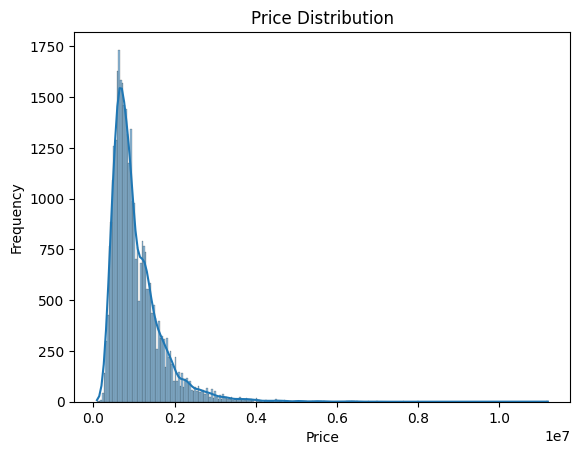

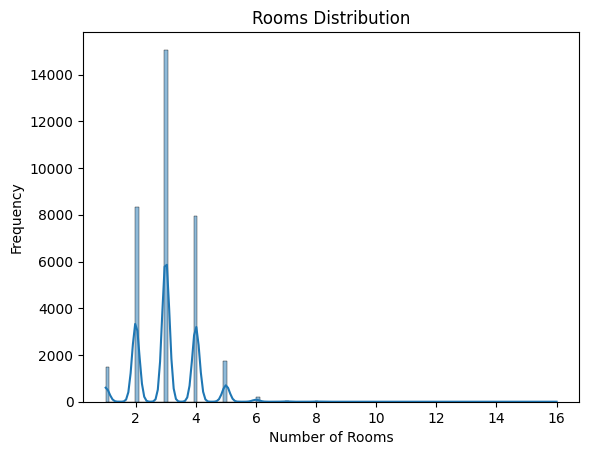

In [ ]:
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Rooms
sns.histplot(df['Rooms'], kde=True)
plt.title('Rooms Distribution')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['RegionName'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [ ]:
# 1. Price Variation by Region:

price_var_region = df.groupby('RegionName')['Price'].describe()
price_var_region

,count,mean,std,min,25%,50%,75%,max
RegionName,,,,,,,,
Eastern Metropolitan,4372.0,1.097459e+06,512519.518330,260000.0,759625.0,985000.0,1320000.0,7000000.0
Eastern Victoria,228.0,8.219336e+05,394541.084782,337000.0,589500.0,720000.0,910495.5,2900000.0
Northern Metropolitan,9531.0,8.949535e+05,482640.782703,112000.0,591000.0,770000.0,1080000.0,6500000.0
Northern Victoria,203.0,6.778596e+05,327792.263392,280000.0,471000.0,588000.0,765500.0,2900000.0
South-Eastern Metropolitan,1733.0,9.233800e+05,496241.325787,255000.0,650000.0,820000.0,1070000.0,9000000.0
Southern Metropolitan,11817.0,1.304525e+06,824318.999789,112000.0,710000.0,1140000.0,1665000.0,11200000.0
Western Metropolitan,6794.0,8.668032e+05,439859.290626,85000.0,590000.0,760000.0,1010000.0,5700000.0
Western Victoria,115.0,5.397283e+05,359915.801809,280000.0,377500.0,420000.0,539000.0,3000000.0


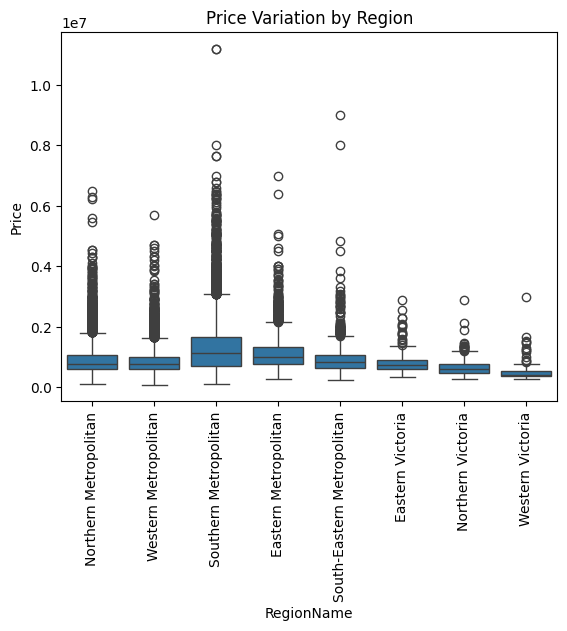

In [ ]:
sns.boxplot(x='RegionName', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Price Variation by Region')
plt.show()

In [ ]:
# 2. Property Size and Price Segmentation:

# How does the distribution of prices compare for properties that have larger building areas (e.g., > 160m²) versus smaller ones (e.g., < 160m²)?
''' Mean building area is 160'''

large_building_area = df[df['BuildingArea'] > 160] # Double bracket to get the dataset instead of boolean true and false
small_building_area = df[df['BuildingArea'] < 160]

In [ ]:
print(large_building_area.describe())

              Rooms         Price      Postcode      Bathroom      Carspots  \
count  12549.000000  1.254900e+04  12549.000000  12549.000000  12549.000000   
mean       3.337158  1.173852e+06   3122.216432      1.845884      1.890669   
std        1.007403  7.423522e+05    117.355296      0.779884      1.062818   
min        1.000000  1.450000e+05   3000.000000      0.000000      0.000000   
25%        3.000000  6.800000e+05   3056.000000      1.000000      1.000000   
50%        3.000000  9.510000e+05   3107.000000      2.000000      2.000000   
75%        4.000000  1.450000e+06   3162.000000      2.000000      2.000000   
max       12.000000  1.120000e+07   3978.000000     12.000000     26.000000   

           Landsize  BuildingArea     YearBuilt  
count  12549.000000  12549.000000  12549.000000  
mean     607.007411    257.067568   1966.809148  
std     1432.660932    709.203958     38.328644  
min        0.000000    160.910000   1196.000000  
25%      301.000000    182.000000   19

In [ ]:
print(small_building_area.describe())

              Rooms         Price      Postcode      Bathroom      Carspots  \
count  21933.000000  2.193300e+04  21933.000000  21933.000000  21933.000000   
mean       2.854147  9.822576e+05   3112.558793      1.499886      1.634067   
std        0.901354  5.725936e+05    103.931025      0.660817      0.978266   
min        1.000000  8.500000e+04   3000.000000      0.000000      0.000000   
25%        2.000000  6.100000e+05   3047.000000      1.000000      1.000000   
50%        3.000000  8.300000e+05   3094.000000      1.000000      2.000000   
75%        3.000000  1.210000e+06   3153.000000      2.000000      2.000000   
max       16.000000  9.000000e+06   3978.000000      8.000000     26.000000   

            Landsize  BuildingArea     YearBuilt  
count   21933.000000  21933.000000  21933.000000  
mean      580.321160    106.772377   1964.559841  
std      3686.931149     33.523297     36.409785  
min         0.000000      0.000000   1196.000000  
25%       193.000000     86.00000

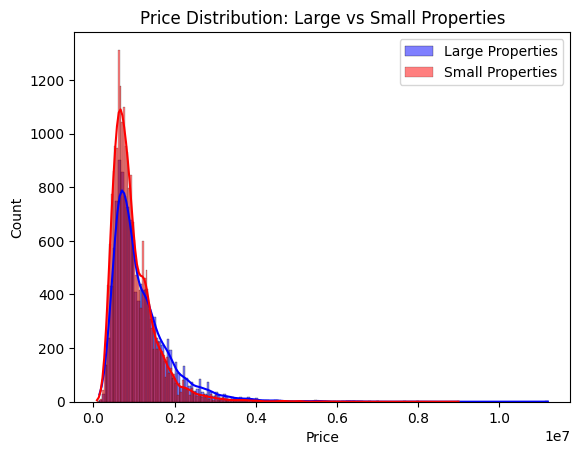

In [ ]:
sns.histplot(large_building_area['Price'], color='blue', label='Large Properties', kde=True)
sns.histplot(small_building_area['Price'], color='red', label='Small Properties', kde=True)
plt.legend()
plt.title('Price Distribution: Large vs Small Properties')
plt.show()

In [ ]:
# 3. Price per Room and Property Type

# What is the average price per room for each property type (house, townhouse, apartment)?

df['Price_per_room'] = df['Price'] / df['Rooms']

avg_price_per_room = df.groupby('Type')['Price_per_room'].mean()
avg_price_per_room

,Price_per_room
Type,
house,361537.745845
townhouse,335526.739242
unit,372664.719237


In [ ]:
# 4. Impact of Year Built on Price Trends:
# How does the price of properties change with the age of the building?

year_built_price_trends = df.groupby('YearBuilt')['Price'].describe()
year_built_price_trends

,count,mean,std,min,25%,50%,75%,max
YearBuilt,,,,,,,,
1196.0,2.0,9.925000e+05,2.934493e+05,785000.0,888750.0,992500.0,1096250.0,1200000.0
1800.0,1.0,9.750000e+05,NaN,975000.0,975000.0,975000.0,975000.0,975000.0
1820.0,3.0,9.820000e+05,4.529316e+05,720000.0,720500.0,721000.0,1113000.0,1505000.0
1830.0,2.0,8.580400e+05,4.299209e+03,855000.0,856520.0,858040.0,859560.0,861080.0
1850.0,7.0,1.677286e+06,1.103267e+06,677000.0,887000.0,1600000.0,1920000.0,3850000.0
...,...,...,...,...,...,...,...,...
2016.0,279.0,1.147624e+06,6.773114e+05,290000.0,650000.0,960000.0,1395000.0,4225000.0
2017.0,189.0,1.063457e+06,6.591824e+05,260000.0,685000.0,900000.0,1250000.0,5410000.0
2018.0,15.0,9.076667e+05,4.610167e+05,290000.0,548000.0,750000.0,1285000.0,2050000.0


In [ ]:
#5. Price Variation with Bathrooms and Carspots:
# Question: How does the number of bathrooms affect the price of properties?
# Is there a noticeable threshold where adding more bathrooms significantly impacts the price?

no_of_bathroom_price = round(df.groupby('Bathroom')['Price'].mean(), 2)
no_of_bathroom_price

,Price
Bathroom,
0.0,1032211.54
1.0,922198.70
2.0,1110757.81
3.0,1404820.15
4.0,1761145.19
5.0,1744560.00
6.0,1938388.89
7.0,2274000.00
8.0,1809000.00


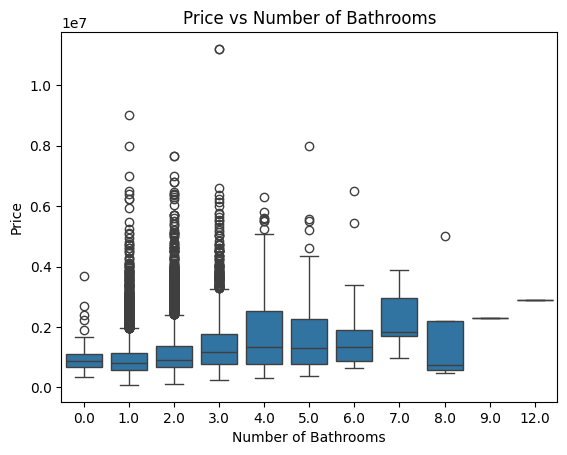

In [ ]:
sns.boxplot(x='Bathroom', y='Price', data=df)
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

In [ ]:
# 6. Council Area Impact on Property Value:
# Question: How do property prices vary across different CouncilAreas?

council_area_prices = round(df.groupby('CouncilArea')['Price'].mean(),2)
council_area_prices

,Price
CouncilArea,
Banyule City Council,970745.72
Bayside City Council,1447312.71
Boroondara City Council,1479896.09
Brimbank City Council,738225.23
Cardinia Shire Council,773463.41
Casey City Council,769231.58
Darebin City Council,921777.37
Frankston City Council,762325.65
Glen Eira City Council,1111090.34


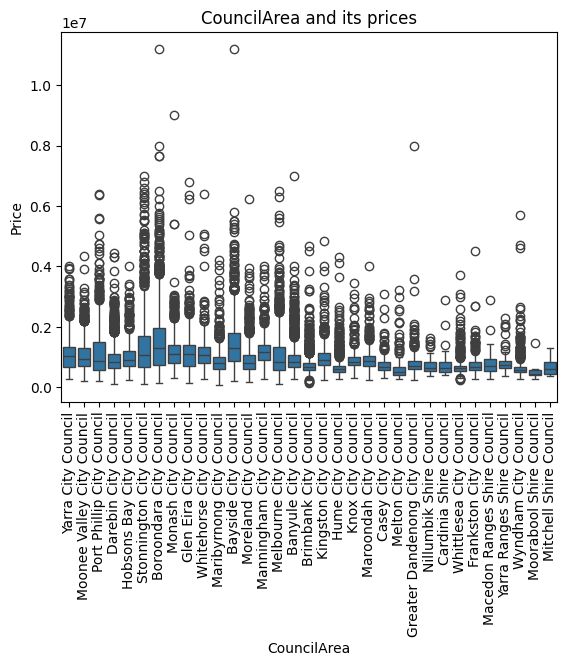

In [ ]:
sns.boxplot(x='CouncilArea', y='Price', data=df)
plt.title('CouncilArea and its prices')
plt.xlabel('CouncilArea')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 7. Postcode Analysis for Price Clusters:
# Question: Are there specific postcodes where certain types of properties (e.g., units, houses) dominate the market,
# and how does this affect pricing within those areas?

postcode_type_properties = round(df.groupby(['Postcode', 'Type'])['Price'].mean().unstack(), 2) # Unstack will take it from the rows and add columns
postcode_type_properties

Type,house,townhouse,unit
Postcode,,,
3000.0,1630000.00,NaN,821380.60
3002.0,2356666.67,975000.00,919292.68
3003.0,1490181.82,1181214.29,721150.00
3006.0,836250.00,NaN,691250.00
3008.0,1903500.00,856000.00,977750.00
...,...,...,...
3910.0,759033.33,NaN,394666.67
3975.0,613750.00,NaN,NaN
3976.0,567571.43,NaN,NaN


In [ ]:
# 8. Outliers and Extreme Values:
# Question: What are the extreme values in the dataset for price, land size,
# or building area? Can you explain why some properties are priced significantly higher or lower than the average?

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(outliers)

               Suburb                Address  Rooms   Type      Price  \
135       Albert Park   112 Beaconsfield Pde      3  house  2850000.0   
139       Albert Park              9 Boyd St      3  house  2714000.0   
142       Albert Park      104 Richardson St      4  house  2300000.0   
146       Albert Park        114 Victoria Av      3  house  2485000.0   
152       Albert Park            2 Dundas Pl      3  house  2615000.0   
...               ...                    ...    ...    ...        ...   
34623  Port Melbourne  1/29 Beaconsfield Pde      3   unit  2610000.0   
34632         Prahran           61 Murray St      3  house  2500000.0   
34714     South Yarra             54 Oban St      3  house  2855000.0   
34719       Southbank    611/250 St Kilda Rd      3   unit  2685000.0   
34822        Werribee           160 Shaws Rd      2  house  4600000.0   

       Postcode  Bathroom  Carspots  Landsize  BuildingArea  YearBuilt  \
135      3206.0       2.0       0.0     211.0    

In [ ]:
# 9. Effect of Suburb on Property Price:
# Question: How does the suburb correlate with the overall price distribution?
# Are there specific suburbs that exhibit much higher prices compared to others?

suburb_price_comparison = round(df.groupby('Suburb')['Price'].mean().sort_values(ascending=False),2)
print(suburb_price_comparison.head(10)) #

Suburb
Guys Hill      2900000.00
Canterbury     1880373.72
Middle Park    1818316.46
Wonga Park     1758500.00
Brighton       1707000.42
Albert Park    1687638.17
Balwyn         1655961.60
Kew            1608568.35
Camberwell     1595128.74
Malvern        1578123.87
Name: Price, dtype: float64


In [ ]:
# 10. Building Area and Land Size Relation to Price:
# Question: What is the relationship between building area and land size in terms of price?

corr_BuildingArea_landSize = df[['BuildingArea', 'Landsize', 'Price']].corr()
corr_BuildingArea_landSize

,BuildingArea,Landsize,Price
BuildingArea,1.000000,0.043435,0.031767
Landsize,0.043435,1.000000,0.018540
Price,0.031767,0.018540,1.000000


In [ ]:
# 11. Property Availability:

Property_Availability = df['RegionName'].value_counts().reset_index()
Property_Availability

,RegionName,count
0,Southern Metropolitan,11817
1,Northern Metropolitan,9531
2,Western Metropolitan,6794
3,Eastern Metropolitan,4372
4,South-Eastern Metropolitan,1733
5,Eastern Victoria,228
6,Northern Victoria,203
7,Western Victoria,115


In [ ]:
# 12. Age of Properties:
# Answer: To calculate the proportion of properties before and after 2000:

Old_properties_count = df[df['YearBuilt'] < 2000].shape[0]
Old_properties_count

25929

In [ ]:
new_properties_count = df[df['YearBuilt'] >= 2000].shape[0]
new_properties_count

8864

In [ ]:
proporion_old = Old_properties_count / df.shape[0]
proporion_old

0.7452361107119249

In [ ]:
proportion_new = new_properties_count / df.shape[0]
proportion_new

0.2547638892880752

In [ ]:
# 13. Density Analysis:
# Answer: To compare BuildingArea and Landsize for each Type

density_analysis = df.groupby('Type')[['BuildingArea', 'Landsize']].mean()
density_analysis

,BuildingArea,Landsize
Type,,
house,170.147842,616.241543
townhouse,153.856038,462.816018
unit,136.580445,563.085349


In [ ]:
# 14. Correlation Analysis

corr_matrix = df[['Price', 'BuildingArea', 'Landsize', 'Rooms']].corr()
corr_matrix

,Price,BuildingArea,Landsize,Rooms
Price,1.000000,0.031767,0.018540,0.360847
BuildingArea,0.031767,1.000000,0.043435,0.059161
Landsize,0.018540,0.043435,1.000000,0.023235
Rooms,0.360847,0.059161,0.023235,1.000000


In [ ]:
# 15. Investment Potential:
# Answer: To find properties with low price but high growth potential:
low_price_high_growth = df[(df['Price'] < df['Price'].quantile(0.33)) & (df['BuildingArea'] > df['BuildingArea'].median())]
low_price_high_growth

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room
8,Abbotsford,53 Turner St,2,house,588000.0,3067.0,1.0,2.0,201.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,294000.0
29,Abbotsford,7/20 Abbotsford St,1,unit,441000.0,3067.0,1.0,1.0,0.0,165.0,1963.0,Yarra City Council,Northern Metropolitan,441000.0
46,Abbotsford,119/52 Nicholson St,1,unit,423500.0,3067.0,1.0,2.0,0.0,155.0,1900.0,Yarra City Council,Northern Metropolitan,423500.0
48,Abbotsford,5/20 Abbotsford St,1,unit,426000.0,3067.0,1.0,1.0,0.0,252.0,1950.0,Yarra City Council,Northern Metropolitan,426000.0
52,Abbotsford,49/84 Trenerry Cr,2,house,700000.0,3067.0,1.0,1.0,590.0,154.0,1960.0,Yarra City Council,Northern Metropolitan,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34834,Wheelers Hill,112 Jells Rd,4,house,495000.0,3150.0,2.0,2.0,714.0,289.0,1986.0,Monash City Council,South-Eastern Metropolitan,123750.0
34839,Williamstown,24/18 Station Rd,2,unit,475000.0,3016.0,4.0,2.0,406.0,201.0,1925.0,Hobsons Bay City Council,Western Metropolitan,237500.0
34844,Windsor,4/16 Lewisham Rd,1,unit,440000.0,3181.0,1.0,2.0,658.0,159.0,1930.0,Port Phillip City Council,Southern Metropolitan,440000.0
34848,Wollert,16 Gunther Wy,4,house,621000.0,3750.0,2.0,2.0,375.0,173.0,2010.0,Whittlesea City Council,Northern Metropolitan,155250.0


In [ ]:
# 16. Suburb Development:
# Answer: Identify suburbs with increasing prices over time:

avg_price_by_suburb = df.groupby(['Suburb', 'YearBuilt'])['Price'].mean()
avg_price_by_suburb

Suburb      YearBuilt
Abbotsford  1860.0       7.600000e+05
            1880.0       1.307667e+06
            1888.0       1.165000e+06
            1890.0       1.251850e+06
            1900.0       1.061450e+06
                             ...     
Yarraville  2016.0       1.664700e+06
            2017.0       1.050333e+06
            2018.0       8.880000e+05
croydon     1950.0       7.300000e+05
viewbank    1960.0       8.850000e+05
Name: Price, Length: 10262, dtype: float64

In [ ]:
column_names = df.columns
column_names

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom',
       'Carspots', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'RegionName', 'Price_per_room'],
      dtype='object')

In [ ]:
# 17. Find houses with Rooms >= 3, Bathroom >= 2, Landsize > 500

client_condition1 = df[(df['Rooms'] >= 3) & (df['Bathroom'] >= 2) & (df['Landsize'] > 500)]
client_condition1

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room
26,Abbotsford,22 Park St,4,house,1985000.0,3067.0,2.0,1.0,586.0,100.0,1950.0,Yarra City Council,Northern Metropolitan,496250.000000
38,Abbotsford,3/72 Charles St,4,house,1330000.0,3067.0,2.0,2.0,780.0,135.0,1900.0,Yarra City Council,Northern Metropolitan,332500.000000
41,Abbotsford,138/56 Nicholson St,3,unit,1090000.0,3067.0,2.0,2.0,4290.0,27.0,1915.0,Yarra City Council,Northern Metropolitan,363333.333333
64,Abbotsford,22 Park St,4,house,741000.0,3067.0,2.0,2.0,649.0,170.0,2016.0,Yarra City Council,Northern Metropolitan,185250.000000
81,Airport West,11 Harrington Rd,6,house,725000.0,3042.0,3.0,2.0,976.0,186.0,1980.0,Moonee Valley City Council,Western Metropolitan,120833.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34831,Westmeadows,35 Arnside Cr,4,house,675000.0,3049.0,2.0,5.0,560.0,148.0,1980.0,Hume City Council,Northern Metropolitan,168750.000000
34833,Wheelers Hill,45 Chancellor Dr,4,house,936000.0,3150.0,2.0,2.0,770.0,105.0,1992.0,Monash City Council,South-Eastern Metropolitan,234000.000000
34834,Wheelers Hill,112 Jells Rd,4,house,495000.0,3150.0,2.0,2.0,714.0,289.0,1986.0,Monash City Council,South-Eastern Metropolitan,123750.000000
34835,Wheelers Hill,20 Mill Ct,3,house,850000.0,3150.0,2.0,2.0,677.0,101.0,2012.0,Monash City Council,South-Eastern Metropolitan,283333.333333


In [ ]:
# client_condition1
print(round(client_condition1['Price'].describe()),2)

count        8888.0
mean      1281712.0
std        802947.0
min        222000.0
25%        740000.0
50%       1050000.0
75%       1581250.0
max      11200000.0
Name: Price, dtype: float64 2


In [ ]:
# number of houses in each regions with price > 1500000
region_price = df[df['Price'] > 1500000]['RegionName'].value_counts()
region_price

,count
RegionName,
Southern Metropolitan,3644
Northern Metropolitan,885
Eastern Metropolitan,672
Western Metropolitan,503
South-Eastern Metropolitan,117
Eastern Victoria,15
Northern Victoria,3
Western Victoria,3


In [ ]:
# 18. Old_properties price vs new properties price
Old_properties = df[df['YearBuilt'] < 2000]
Old_properties

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room
0,Abbotsford,68 Studley St,2,house,1025000.0,3067.0,1.0,1.0,126.0,132.0,1900.0,Yarra City Council,Northern Metropolitan,512500.000000
2,Abbotsford,25 Bloomburg St,2,house,1035000.0,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,517500.000000
3,Abbotsford,18/659 Victoria St,3,unit,700000.0,3067.0,2.0,1.0,0.0,113.0,1960.0,Yarra City Council,Northern Metropolitan,233333.333333
4,Abbotsford,5 Charles St,3,house,1465000.0,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,488333.333333
5,Abbotsford,40 Federation La,3,house,850000.0,3067.0,2.0,1.0,94.0,74.0,1910.0,Yarra City Council,Northern Metropolitan,283333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34844,Windsor,4/16 Lewisham Rd,1,unit,440000.0,3181.0,1.0,2.0,658.0,159.0,1930.0,Port Phillip City Council,Southern Metropolitan,440000.000000
34851,Yarraville,78 Bayview Rd,3,house,1101000.0,3013.0,1.0,2.0,288.0,120.0,1998.0,Maribyrnong City Council,Western Metropolitan,367000.000000
34852,Yarraville,13 Burns St,4,house,1480000.0,3013.0,1.0,3.0,593.0,398.0,1950.0,Maribyrnong City Council,Western Metropolitan,370000.000000
34855,Yarraville,12/37 Stephen St,3,house,1140000.0,3013.0,2.0,3.0,359.0,155.0,1970.0,Maribyrnong City Council,Western Metropolitan,380000.000000


In [ ]:
Old_properties_price_avg = Old_properties['Price'].mean()
Old_properties_price_avg

1068020.0317019552

In [ ]:
new_properties = df[df['YearBuilt'] >= 2000]
new_properties

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room
1,Abbotsford,85 Turner St,2,house,1480000.0,3067.0,1.0,1.0,202.0,88.0,2007.0,Yarra City Council,Northern Metropolitan,740000.000000
6,Abbotsford,55a Park St,4,house,1600000.0,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,400000.000000
7,Abbotsford,16 Maugie St,4,house,1790000.0,3067.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,Northern Metropolitan,447500.000000
12,Abbotsford,121/56 Nicholson St,2,unit,1160000.0,3067.0,2.0,1.0,4292.0,82.0,2009.0,Yarra City Council,Northern Metropolitan,580000.000000
22,Abbotsford,106/119 Turner St,1,unit,481000.0,3067.0,1.0,0.0,104.0,83.0,2009.0,Yarra City Council,Northern Metropolitan,481000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,Wollert,16 Gunther Wy,4,house,621000.0,3750.0,2.0,2.0,375.0,173.0,2010.0,Whittlesea City Council,Northern Metropolitan,155250.000000
34849,Wollert,35 Kingscote Wy,3,house,570000.0,3750.0,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,Northern Metropolitan,190000.000000
34850,Wollert,15 Rockgarden Wy,3,house,440000.0,3750.0,2.0,2.0,268.0,135.0,2016.0,Whittlesea City Council,Northern Metropolitan,146666.666667
34853,Yarraville,29A Murray St,2,house,888000.0,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,444000.000000


In [ ]:
new_properties_avg_price = new_properties['Price'].mean()
new_properties_avg_price

1007120.995148917

In [ ]:
# 19. Comparing Property Types:
# Question: Compare the average price of Houses versus Apartments based on Landsize and Rooms.

'''here we have get specific values from a column''' # so lets get all the houses and apartments separate
houses = df[df['Type'] == 'house']
houses

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room
0,Abbotsford,68 Studley St,2,house,1025000.0,3067.0,1.0,1.0,126.0,132.0,1900.0,Yarra City Council,Northern Metropolitan,512500.000000
1,Abbotsford,85 Turner St,2,house,1480000.0,3067.0,1.0,1.0,202.0,88.0,2007.0,Yarra City Council,Northern Metropolitan,740000.000000
2,Abbotsford,25 Bloomburg St,2,house,1035000.0,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,517500.000000
4,Abbotsford,5 Charles St,3,house,1465000.0,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,488333.333333
5,Abbotsford,40 Federation La,3,house,850000.0,3067.0,2.0,1.0,94.0,74.0,1910.0,Yarra City Council,Northern Metropolitan,283333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,Yarraville,78 Bayview Rd,3,house,1101000.0,3013.0,1.0,2.0,288.0,120.0,1998.0,Maribyrnong City Council,Western Metropolitan,367000.000000
34852,Yarraville,13 Burns St,4,house,1480000.0,3013.0,1.0,3.0,593.0,398.0,1950.0,Maribyrnong City Council,Western Metropolitan,370000.000000
34853,Yarraville,29A Murray St,2,house,888000.0,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,Western Metropolitan,444000.000000
34855,Yarraville,12/37 Stephen St,3,house,1140000.0,3013.0,2.0,3.0,359.0,155.0,1970.0,Maribyrnong City Council,Western Metropolitan,380000.000000


In [ ]:
client_condition2 = round(houses[['Price', 'Landsize', 'Rooms']].mean(), 2)
client_condition2

,0
Price,1171600.45
Landsize,616.24
Rooms,3.36


In [ ]:
apartments = df[df['Type'] == 'unit']
apartments

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room
3,Abbotsford,18/659 Victoria St,3,unit,700000.0,3067.0,2.0,1.0,0.0,113.0,1960.0,Yarra City Council,Northern Metropolitan,233333.333333
12,Abbotsford,121/56 Nicholson St,2,unit,1160000.0,3067.0,2.0,1.0,4292.0,82.0,2009.0,Yarra City Council,Northern Metropolitan,580000.000000
17,Abbotsford,6/241 Nicholson St,1,unit,300000.0,3067.0,1.0,1.0,0.0,73.0,1960.0,Yarra City Council,Northern Metropolitan,300000.000000
19,Abbotsford,403/609 Victoria St,2,unit,542000.0,3067.0,1.0,1.0,928.0,92.0,1903.0,Yarra City Council,Northern Metropolitan,271000.000000
21,Abbotsford,25/84 Trenerry Cr,2,unit,760000.0,3067.0,2.0,2.0,350.0,194.0,1955.0,Yarra City Council,Northern Metropolitan,380000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,Westmeadows,2/8 Forman St,4,unit,689000.0,3049.0,4.0,2.0,447.0,104.0,2012.0,Hume City Council,Northern Metropolitan,172250.000000
34838,Williamstown,11/81 Melbourne Rd,2,unit,450000.0,3016.0,1.0,2.0,780.0,120.0,1910.0,Hobsons Bay City Council,Western Metropolitan,225000.000000
34839,Williamstown,24/18 Station Rd,2,unit,475000.0,3016.0,4.0,2.0,406.0,201.0,1925.0,Hobsons Bay City Council,Western Metropolitan,237500.000000
34840,Williamstown,3/2 Thompson St,2,unit,520000.0,3016.0,1.0,2.0,0.0,115.0,1920.0,Hobsons Bay City Council,Western Metropolitan,260000.000000


In [ ]:
client_condition3 = apartments[['Price', 'Landsize', 'Rooms']].mean()
client_condition3


,0
Price,707749.645684
Landsize,563.085349
Rooms,2.016630


In [ ]:
# 20. Comparison of Property Size vs. Price

df['AreaComparison'] = pd.cut(df['BuildingArea'], bins = [0, 100, 300, df['BuildingArea'].max()], labels=['Small', 'Medium', 'Large'])
round(df.groupby('AreaComparison')['Price'].mean(),2)

<ipython-input-76-c355721aa2b0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(df.groupby('AreaComparison')['Price'].mean(),2)


,Price
AreaComparison,
Small,930484.32
Medium,1069385.90
Large,1342697.17


# Comparison Questions

In [ ]:
# 1. Price Comparison by Property Type

property_type_prices = df.groupby('Type')['Price'].mean()
property_type_prices


,Price
Type,
house,1.171600e+06
townhouse,9.563375e+05
unit,7.077496e+05


In [ ]:
# 2. Comparison of Price Variability by Suburb

Price_Variability_Suburb = df.groupby('Suburb')['Price'].std()
Price_Variability_Suburb

,Price
Suburb,
Abbotsford,393281.266150
Aberfeldie,681400.842057
Airport West,266124.450605
Albanvale,297757.820687
Albert Park,832830.028042
...,...
Yallambie,367694.423963
Yarra Glen,NaN
Yarraville,478531.805758


In [ ]:
df.columns.unique()

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom',
       'Carspots', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'RegionName', 'Price_per_room', 'AreaComparison'],
      dtype='object')

In [ ]:
# 8. Comparison of Price to Landsize

df['land_size_category'] = pd.cut(df['Landsize'], bins = [200, 400, 500, df['Landsize'].max()], labels = ['Small_LandSize', 'Medium_LandSize', 'Big_LandSize'])

land_size_price_comparision = round(df.groupby('land_size_category')['Price'].mean(),2)
land_size_price_comparision

<ipython-input-80-943bdd766316>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  land_size_price_comparision = round(df.groupby('land_size_category')['Price'].mean(),2)


,Price
land_size_category,
Small_LandSize,1060879.74
Medium_LandSize,1089008.28
Big_LandSize,1111106.70


In [ ]:
# 10. Comparison of Building Area to Price by Region

area_price_region = round(df.groupby(['AreaComparison', 'RegionName'])['Price'].mean(),2)
area_price_region

<ipython-input-81-1fa0cdb79101>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_price_region = round(df.groupby(['AreaComparison', 'RegionName'])['Price'].mean(),2)


AreaComparison  RegionName                
Small           Eastern Metropolitan          1007993.76
                Eastern Victoria               800850.93
                Northern Metropolitan          807385.19
                Northern Victoria              631075.00
                South-Eastern Metropolitan     908633.67
                Southern Metropolitan         1095224.76
                Western Metropolitan           792047.61
                Western Victoria               569360.00
Medium          Eastern Metropolitan          1097243.45
                Eastern Victoria               805730.66
                Northern Metropolitan          925539.07
                Northern Victoria              666473.68
                South-Eastern Metropolitan     920857.20
                Southern Metropolitan         1334463.33
                Western Metropolitan           881664.98
                Western Victoria               523349.43
Large           Eastern Metropolitan          1355559.78
                Eastern Victoria               945033.33
                Northern Metropolitan          944749.17
                Northern Victoria              918083.33
                South-Eastern Metropolitan    1013278.65
                Southern Metropolitan         1746388.82
                Western Metropolitan           984239.33
                Western Victoria               890000.00
Name: Price, dtype: float64

In [ ]:
#11. Comparison of Price Across Postcode Zones

price_across_postcode = round(df.groupby('Postcode')['Price'].mean(),2)
price_across_postcode

,Price
Postcode,
3000.0,825383.66
3002.0,1292948.28
3003.0,1075083.33
3006.0,698881.58
3008.0,1078250.00
...,...
3910.0,698305.56
3975.0,613750.00
3976.0,567571.43


In [ ]:
# 14. Price Comparison of Houses with Different Floor Plans
'''Answer: Displays average prices for houses based on the number of rooms.'''
avg_price_house_rooms = round(houses.groupby('Rooms')['Price'].mean(),2)
avg_price_house_rooms

,Price
Rooms,
1,856185.56
2,1013112.93
3,1058403.53
4,1305777.76
5,1588865.82
6,1648873.50
7,1620734.38
8,1471076.00
9,1152833.33


In [ ]:
cheap_properties = df[df['Price'] < df['Price'] .quantile(0.1)]
cheap_properties

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
17,Abbotsford,6/241 Nicholson St,1,unit,300000.0,3067.0,1.0,1.0,0.0,73.0,1960.0,Yarra City Council,Northern Metropolitan,300000.000000,Small,NaN
22,Abbotsford,106/119 Turner St,1,unit,481000.0,3067.0,1.0,0.0,104.0,83.0,2009.0,Yarra City Council,Northern Metropolitan,481000.000000,Small,NaN
29,Abbotsford,7/20 Abbotsford St,1,unit,441000.0,3067.0,1.0,1.0,0.0,165.0,1963.0,Yarra City Council,Northern Metropolitan,441000.000000,Medium,NaN
45,Abbotsford,65/80 Trenerry Cr,1,unit,480000.0,3067.0,2.0,0.0,463.0,132.0,1984.0,Yarra City Council,Northern Metropolitan,480000.000000,Medium,Medium_LandSize
46,Abbotsford,119/52 Nicholson St,1,unit,423500.0,3067.0,1.0,2.0,0.0,155.0,1900.0,Yarra City Council,Northern Metropolitan,423500.000000,Medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34801,Tullamarine,5/210 Melrose Dr,2,unit,482500.0,3043.0,3.0,1.0,708.0,141.0,1980.0,Brimbank City Council,Western Metropolitan,241250.000000,Medium,Big_LandSize
34838,Williamstown,11/81 Melbourne Rd,2,unit,450000.0,3016.0,1.0,2.0,780.0,120.0,1910.0,Hobsons Bay City Council,Western Metropolitan,225000.000000,Medium,Big_LandSize
34839,Williamstown,24/18 Station Rd,2,unit,475000.0,3016.0,4.0,2.0,406.0,201.0,1925.0,Hobsons Bay City Council,Western Metropolitan,237500.000000,Medium,Medium_LandSize
34844,Windsor,4/16 Lewisham Rd,1,unit,440000.0,3181.0,1.0,2.0,658.0,159.0,1930.0,Port Phillip City Council,Southern Metropolitan,440000.000000,Medium,Big_LandSize


In [ ]:
expensive_properties = df[df['Price'] < df['Price'].quantile(0.1)]
expensive_properties

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
17,Abbotsford,6/241 Nicholson St,1,unit,300000.0,3067.0,1.0,1.0,0.0,73.0,1960.0,Yarra City Council,Northern Metropolitan,300000.000000,Small,NaN
22,Abbotsford,106/119 Turner St,1,unit,481000.0,3067.0,1.0,0.0,104.0,83.0,2009.0,Yarra City Council,Northern Metropolitan,481000.000000,Small,NaN
29,Abbotsford,7/20 Abbotsford St,1,unit,441000.0,3067.0,1.0,1.0,0.0,165.0,1963.0,Yarra City Council,Northern Metropolitan,441000.000000,Medium,NaN
45,Abbotsford,65/80 Trenerry Cr,1,unit,480000.0,3067.0,2.0,0.0,463.0,132.0,1984.0,Yarra City Council,Northern Metropolitan,480000.000000,Medium,Medium_LandSize
46,Abbotsford,119/52 Nicholson St,1,unit,423500.0,3067.0,1.0,2.0,0.0,155.0,1900.0,Yarra City Council,Northern Metropolitan,423500.000000,Medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34801,Tullamarine,5/210 Melrose Dr,2,unit,482500.0,3043.0,3.0,1.0,708.0,141.0,1980.0,Brimbank City Council,Western Metropolitan,241250.000000,Medium,Big_LandSize
34838,Williamstown,11/81 Melbourne Rd,2,unit,450000.0,3016.0,1.0,2.0,780.0,120.0,1910.0,Hobsons Bay City Council,Western Metropolitan,225000.000000,Medium,Big_LandSize
34839,Williamstown,24/18 Station Rd,2,unit,475000.0,3016.0,4.0,2.0,406.0,201.0,1925.0,Hobsons Bay City Council,Western Metropolitan,237500.000000,Medium,Medium_LandSize
34844,Windsor,4/16 Lewisham Rd,1,unit,440000.0,3181.0,1.0,2.0,658.0,159.0,1930.0,Port Phillip City Council,Southern Metropolitan,440000.000000,Medium,Big_LandSize


In [ ]:
cheap_properties.describe(), expensive_properties.describe()

(             Rooms          Price     Postcode     Bathroom     Carspots  \
 count  3427.000000    3427.000000  3427.000000  3427.000000  3427.000000   
 mean      2.182375  400441.719288  3115.742340     1.379341     1.443537   
 std       1.001898   63291.624606   127.331372     0.630250     0.882770   
 min       1.000000   85000.000000  3000.000000     0.000000     0.000000   
 25%       1.000000  360000.000000  3040.000000     1.000000     1.000000   
 50%       2.000000  412500.000000  3073.000000     1.000000     1.000000   
 75%       3.000000  451000.000000  3162.000000     2.000000     2.000000   
 max       9.000000  484852.000000  3977.000000     5.000000     8.000000   
 
            Landsize  BuildingArea    YearBuilt  Price_per_room  
 count   3427.000000   3427.000000  3427.000000     3427.000000  
 mean     536.599650    135.522504  1970.704406   223680.671579  
 std     2198.377527    109.689268    33.162417   102589.275352  
 min        0.000000      0.000000  1857.

In [ ]:
# 26. Compares prices in top 5 high-demand suburbs.

high_demand_suburbs = round(df.groupby('Suburb')['Price'].mean(),2)
high_demand_suburbs

,Price
Suburb,
Abbotsford,1055226.28
Aberfeldie,1250243.75
Airport West,789516.98
Albanvale,627714.29
Albert Park,1687638.17
...,...
Yallambie,882125.00
Yarra Glen,620000.00
Yarraville,1015930.08


# Market Analysis Answers


In [ ]:
# Answer: A table of the top 10 suburbs with their average price and building area.
suburb_avg_prc_area = df.groupby('Suburb')[['Price', 'BuildingArea']].mean().sort_values('Price', ascending=False).head(10)
suburb_avg_prc_area

,Price,BuildingArea
Suburb,,
Guys Hill,2.900000e+06,0.000000
Canterbury,1.880374e+06,186.611679
Middle Park,1.818316e+06,156.227848
Wonga Park,1.758500e+06,217.333333
Brighton,1.707000e+06,182.898651
Albert Park,1.687638e+06,144.311603
Balwyn,1.655962e+06,176.717477
Kew,1.608568e+06,170.978004
Camberwell,1.595129e+06,179.644885


# Client-Specific Property Selection


In [ ]:
# 1. Properties with more than 4 rooms, at least 2 car spots, and a price less than $1 million

client_condition4 = df[(df['Rooms'] > 4) & (df['Carspots'] >= 2) & (df['Price'] < 1000000)]
client_condition4

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
81,Airport West,11 Harrington Rd,6,house,725000.0,3042.0,3.0,2.0,976.0,186.0,1980.0,Moonee Valley City Council,Western Metropolitan,120833.333333,Medium,Big_LandSize
96,Airport West,241 Parer Rd,5,house,755000.0,3042.0,2.0,2.0,596.0,180.0,2000.0,Moonee Valley City Council,Western Metropolitan,151000.000000,Medium,Big_LandSize
742,Ashwood,6 Clearview Cl,5,house,830000.0,3147.0,3.0,2.0,579.0,243.0,1998.0,Monash City Council,Southern Metropolitan,166000.000000,Medium,Big_LandSize
788,Avondale Heights,8 Westminster Dr,5,house,850000.0,3034.0,2.0,4.0,574.0,60.0,1970.0,Moonee Valley City Council,Western Metropolitan,170000.000000,Small,Big_LandSize
911,Balwyn,23 Hertford Cr,5,house,692000.0,3103.0,3.0,2.0,721.0,130.0,1999.0,Boroondara City Council,Southern Metropolitan,138400.000000,Medium,Big_LandSize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34770,Sydenham,8 Brogil Wk,6,house,665000.0,3037.0,1.0,4.0,515.0,102.0,1985.0,Brimbank City Council,Western Metropolitan,110833.333333,Medium,Big_LandSize
34771,Sydenham,3 Steamtrain Cl,5,house,683000.0,3037.0,2.0,2.0,730.0,179.0,1997.0,Brimbank City Council,Western Metropolitan,136600.000000,Medium,Big_LandSize
34798,Toorak,18 Warra St,5,house,830000.0,3142.0,3.0,2.0,830.0,347.0,1900.0,Stonnington City Council,Southern Metropolitan,166000.000000,Large,Big_LandSize
34823,Werribee,27 Sinns Av,5,house,640000.0,3030.0,2.0,4.0,580.0,218.0,1970.0,Wyndham City Council,Western Metropolitan,128000.000000,Medium,Big_LandSize


In [ ]:
#2. Apartments with a BuildingArea over 100 sqm in Richmond:

client_condition5 = df[(df['BuildingArea'] > 100) & (df['Suburb'] == 'Richmond')]
client_condition5

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
8713,Richmond,24 Butler St,2,house,937000.0,3121.0,1.0,1.0,125.0,103.0,1950.0,Yarra City Council,Northern Metropolitan,468500.000000,Medium,NaN
8715,Richmond,49 Glass St,3,house,1820000.0,3121.0,2.0,1.0,316.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,606666.666667,Medium,Small_LandSize
8716,Richmond,52 Lyndhurst St,3,townhouse,1236000.0,3121.0,2.0,1.0,675.0,199.0,1990.0,Yarra City Council,Northern Metropolitan,412000.000000,Medium,Big_LandSize
8717,Richmond,409/120 Palmer St,2,unit,540000.0,3121.0,2.0,1.0,656.0,257.0,1960.0,Yarra City Council,Northern Metropolitan,270000.000000,Medium,Big_LandSize
8721,Richmond,7 Bank St,3,house,1600000.0,3121.0,2.0,1.0,115.0,111.0,2012.0,Yarra City Council,Northern Metropolitan,533333.333333,Medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,Richmond,39 Gipps St,3,house,1777500.0,3121.0,1.0,2.0,113.0,140.0,1880.0,Yarra City Council,Northern Metropolitan,592500.000000,Medium,NaN
34664,Richmond,406/8 Howard St,2,unit,685000.0,3121.0,1.0,2.0,278.0,133.0,1955.0,Yarra City Council,Northern Metropolitan,342500.000000,Medium,Small_LandSize
34665,Richmond,17 Johnson St,3,house,1510000.0,3121.0,2.0,0.0,274.0,165.0,1928.0,Yarra City Council,Northern Metropolitan,503333.333333,Medium,Small_LandSize
34669,Richmond,29/24 Tanner St,2,unit,969000.0,3121.0,1.0,2.0,594.0,142.6,2000.0,Yarra City Council,Northern Metropolitan,484500.000000,Medium,Big_LandSize


In [ ]:
# 3. Properties built after 2010, with at least 3 bathrooms, in Boroondara CouncilArea
client_condition6 = df[(df['YearBuilt'] >= 2010) & (df['Bathroom'] >= 3) & (df['CouncilArea'].str.contains('Boroondara', case=False))]
client_condition6

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
597,Ashburton,61 Dent St,4,house,2650000.0,3147.0,3.0,2.0,753.0,399.0,2015.0,Boroondara City Council,Southern Metropolitan,662500.000000,Large,Big_LandSize
601,Ashburton,3/39 Solway St,3,townhouse,2050000.0,3147.0,3.0,4.0,310.0,315.0,2014.0,Boroondara City Council,Southern Metropolitan,683333.333333,Large,Small_LandSize
606,Ashburton,2 Benghazi Av,3,house,1425000.0,3147.0,4.0,2.0,773.0,95.0,2013.0,Boroondara City Council,Southern Metropolitan,475000.000000,Small,Big_LandSize
618,Ashburton,3a Mernda Av,4,house,1880000.0,3147.0,3.0,3.0,408.0,138.0,2012.0,Boroondara City Council,Southern Metropolitan,470000.000000,Medium,Medium_LandSize
642,Ashburton,29A Yuile St,5,house,3510000.0,3147.0,5.0,2.0,755.0,444.0,2015.0,Boroondara City Council,Southern Metropolitan,702000.000000,Large,Big_LandSize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31864,Kew,23 Duke St,5,house,600000.0,3101.0,5.0,12.0,835.0,447.0,2011.0,Boroondara City Council,Southern Metropolitan,120000.000000,Large,Big_LandSize
31870,Kew,157 Wellington St,4,house,2695000.0,3101.0,3.0,2.0,369.0,235.0,2010.0,Boroondara City Council,Southern Metropolitan,673750.000000,Medium,Small_LandSize
33149,Camberwell,2/2 Garden Rd,3,house,1430000.0,3124.0,3.0,2.0,219.0,189.0,2013.0,Boroondara City Council,Southern Metropolitan,476666.666667,Medium,Small_LandSize
33152,Camberwell,20 Gowar Av,5,house,2450000.0,3124.0,3.0,2.0,725.0,190.0,2012.0,Boroondara City Council,Southern Metropolitan,490000.000000,Medium,Big_LandSize


In [ ]:
# 4. Properties with exactly 5 rooms, 2 bathrooms, and a price above the median:

client_condition7 = df[(df['Rooms'] == 5) & (df['Bathroom'] == 2) & (df['Price'] > df['Price'].median())]
client_condition7

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
153,Albert Park,23 Finlay St,5,house,2100000.0,3206.0,2.0,1.0,237.0,115.0,1970.0,Port Phillip City Council,Southern Metropolitan,420000.0,Medium,Small_LandSize
227,Alphington,21 Como St,5,house,1678000.0,3078.0,2.0,2.0,552.0,211.0,1916.0,Darebin City Council,Northern Metropolitan,335600.0,Medium,Big_LandSize
329,Altona North,9 Begonia Av,5,house,972000.0,3025.0,2.0,1.0,649.0,67.0,1975.0,Hobsons Bay City Council,Western Metropolitan,194400.0,Small,Big_LandSize
390,Armadale,553 Dandenong Rd,5,house,1525000.0,3143.0,2.0,2.0,693.0,129.0,1965.0,Stonnington City Council,Southern Metropolitan,305000.0,Medium,Big_LandSize
478,Armadale,16 Llaneast St,5,house,2810000.0,3143.0,2.0,2.0,617.0,176.0,1940.0,Stonnington City Council,Southern Metropolitan,562000.0,Medium,Big_LandSize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34549,Mount Waverley,4 Lemon Gr,5,house,1430000.0,3149.0,2.0,4.0,725.0,153.0,1998.0,Monash City Council,Eastern Metropolitan,286000.0,Medium,Big_LandSize
34557,Mulgrave,4 Locarno Ct,5,house,1130000.0,3170.0,2.0,3.0,652.0,140.0,1980.0,Monash City Council,South-Eastern Metropolitan,226000.0,Medium,Big_LandSize
34685,Roxburgh Park,2 Kingdom Ct,5,house,1135000.0,3064.0,2.0,2.0,541.0,235.0,2004.0,Hume City Council,Northern Metropolitan,227000.0,Medium,Big_LandSize
34780,Templestowe Lower,4 Roma Ct,5,house,1350000.0,3107.0,2.0,2.0,805.0,250.0,1980.0,Manningham City Council,Eastern Metropolitan,270000.0,Medium,Big_LandSize


In [ ]:
#5. Properties priced below $700,000, with landsizes over 600 sqm, in regions with "North" in the name:

client_condition7 = df[(df['Price'] < 700000) & (df['Landsize'] > 600) & (df['RegionName'].str.contains('North', case=False))]
client_condition7

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
19,Abbotsford,403/609 Victoria St,2,unit,542000.0,3067.0,1.0,1.0,928.0,92.0,1903.0,Yarra City Council,Northern Metropolitan,271000.000000,Small,Big_LandSize
2145,Brunswick,15/195 Brunswick Rd,2,unit,570000.0,3056.0,3.0,1.0,718.0,110.0,2000.0,Moreland City Council,Northern Metropolitan,285000.000000,Medium,Big_LandSize
2185,Brunswick,314/1 Lygon St,1,unit,599500.0,3056.0,1.0,0.0,1674.0,50.0,2013.0,Moreland City Council,Northern Metropolitan,599500.000000,Small,Big_LandSize
2208,Brunswick,6/837 Park St,2,unit,600000.0,3056.0,1.0,1.0,768.0,269.0,1970.0,Moreland City Council,Northern Metropolitan,300000.000000,Medium,Big_LandSize
2234,Brunswick,23/10 Breese St,2,unit,501000.0,3056.0,1.0,1.0,1140.0,80.0,2010.0,Moreland City Council,Northern Metropolitan,250500.000000,Small,Big_LandSize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34659,Reservoir,11 Rathcown Rd,5,house,690000.0,3073.0,2.0,2.0,650.0,223.0,1970.0,Darebin City Council,Northern Metropolitan,138000.000000,Medium,Big_LandSize
34686,Roxburgh Park,88 Lakeside Dr,3,house,620000.0,3064.0,1.0,2.0,677.0,44.0,1920.0,Hume City Council,Northern Metropolitan,206666.666667,Small,Big_LandSize
34784,Thomastown,6 Glebe Pl,3,house,625000.0,3074.0,1.0,6.0,609.0,162.0,1970.0,Whittlesea City Council,Northern Metropolitan,208333.333333,Medium,Big_LandSize
34794,Thornbury,9/37 Woolton Av,2,unit,682000.0,3071.0,3.0,2.0,772.0,81.0,2006.0,Darebin City Council,Northern Metropolitan,341000.000000,Small,Big_LandSize


In [ ]:
# 6. Family-friendly homes with 4+ rooms, 2 bathrooms, and high transaction suburbs:

high_transaction_suburbs = df['Suburb'].value_counts().head(10).index
client_condition8 = df[(df['Rooms'] > 4) & (df['Bathroom'] == 2) & (df['Suburb'].isin(high_transaction_suburbs))]
client_condition8

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category
1366,Bentleigh East,19 Denver St,5,house,1275000.0,3165.0,2.0,2.0,683.0,190.0,1960.0,Glen Eira City Council,Southern Metropolitan,255000.0,Medium,Big_LandSize
1401,Bentleigh East,25 Connie St,5,house,950000.0,3165.0,2.0,4.0,618.0,146.0,1950.0,Glen Eira City Council,Southern Metropolitan,190000.0,Medium,Big_LandSize
1492,Bentleigh East,790 North Rd,5,house,1600000.0,3165.0,2.0,2.0,659.0,315.0,1930.0,Glen Eira City Council,Southern Metropolitan,320000.0,Large,Big_LandSize
1496,Bentleigh East,29 Beddoe Av,5,house,1260000.0,3165.0,2.0,2.0,459.0,71.0,1997.0,Glen Eira City Council,Southern Metropolitan,252000.0,Small,Medium_LandSize
1501,Bentleigh East,5 Kennedy St,5,house,1475000.0,3165.0,2.0,2.0,729.0,71.0,1900.0,Glen Eira City Council,Southern Metropolitan,295000.0,Small,Big_LandSize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33466,Kew,18 Pakington St,5,house,2600000.0,3101.0,2.0,2.0,660.0,221.0,1915.0,Boroondara City Council,Southern Metropolitan,520000.0,Medium,Big_LandSize
33761,South Yarra,47 Surrey Rd,5,house,1220000.0,3141.0,2.0,4.0,681.0,212.0,1880.0,Melbourne City Council,Southern Metropolitan,244000.0,Medium,Big_LandSize
34019,Brighton,74 Well St,5,house,3800000.0,3186.0,2.0,2.0,624.0,438.0,2000.0,Bayside City Council,Southern Metropolitan,760000.0,Large,Big_LandSize
34280,Glen Iris,34 Renwick St,5,house,655000.0,3146.0,2.0,2.0,713.0,111.0,1930.0,Boroondara City Council,Southern Metropolitan,131000.0,Medium,Big_LandSize


In [ ]:
# 7. Properties with price-per-room > $200,000 in Inner East:

df['price_per_room1'] = df['Price'] / df['Rooms']
client_condition9 = df[(df['price_per_room1'] > 200000) & df['Suburb'].str.contains('Inner East', case=False)]
client_condition9

,Suburb,Address,Rooms,Type,Price,Postcode,Bathroom,Carspots,Landsize,BuildingArea,YearBuilt,CouncilArea,RegionName,Price_per_room,AreaComparison,land_size_category,price_per_room1


In [ ]:
df['price_per_room1']

,price_per_room1
0,512500.000000
1,740000.000000
2,517500.000000
3,233333.333333
4,488333.333333
...,...
34852,370000.000000
34853,444000.000000
34854,352500.000000
34855,380000.000000
